In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
Degree = 4 # degree
Height = 4 # Height of the tree

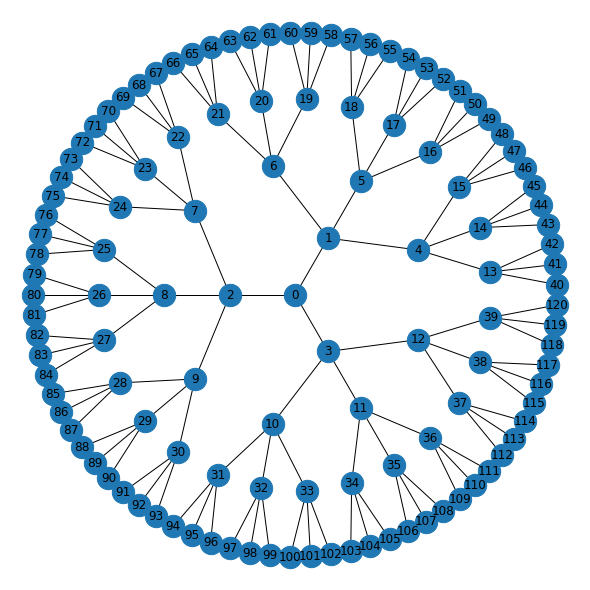

[[52, 72], [99, 118], [106, 3], [102, 98]]


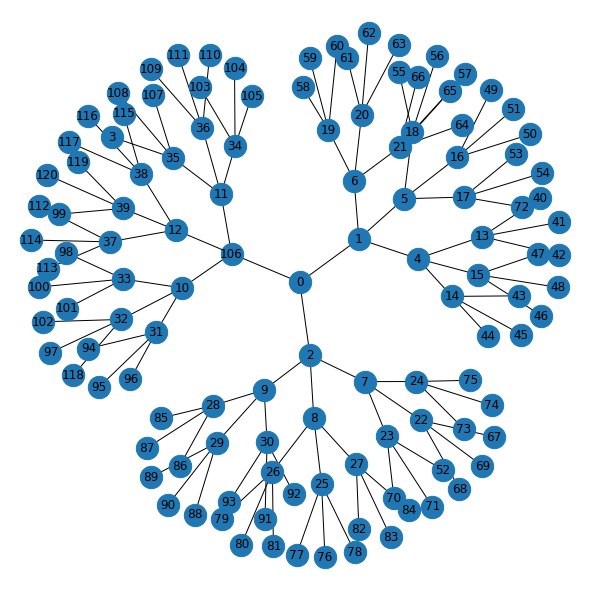

In [10]:
import imp 

import graph_gen
imp.reload(graph_gen)
N, J_interaction = graph_gen.tree_interaction(Degree,Height)

#H = np.random.random(N)
H = np.zeros(N)

num_swap = 4
swaps = []
nodes = list(range(N))
for n in range(num_swap):
    ss_temp = random.sample(nodes, 2)
    swaps.append(ss_temp)
    #print(ss_temp)
    nodes.remove(ss_temp[0])
    nodes.remove(ss_temp[1])
    
print(swaps)

J_interaction_rand = J_interaction.copy()
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    J_interaction_rand[w] = J_interaction_rand[rev] 
    J_interaction_rand[:,w] = J_interaction_rand[:,rev] 
    H_rand[w] = H_rand[rev]
J_interaction_rand
graph_gen.plot_matrix_graph(J_interaction_rand)

betas = np.arange(1e-6,2,1e-2)
betas_fast = np.arange(1e-6,2,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [11]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)

In [12]:
from save_data import save_pickle_zip
save_pickle_zip("./models/tree_large.pkl", tree)
save_pickle_zip("./models/tree_rand_large.pkl", tree_rand)

# Rand h field

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


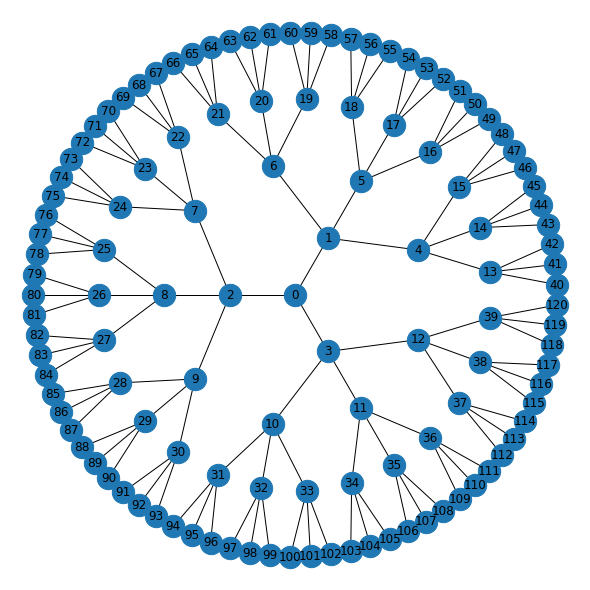

[[32, 9], [94, 68], [25, 39], [45, 37]]


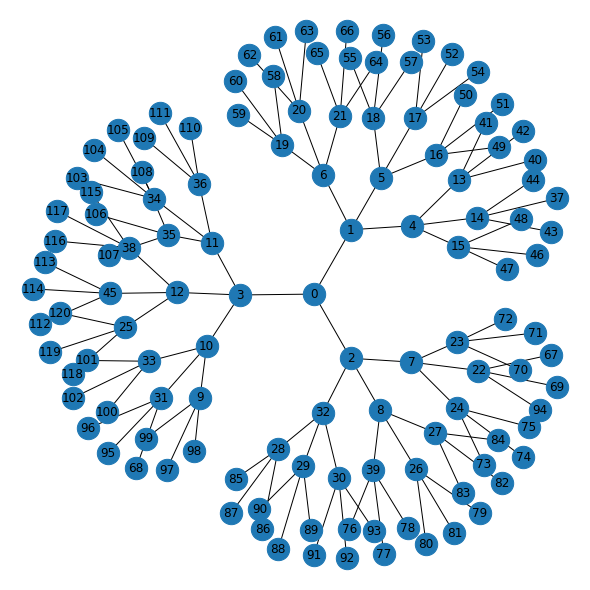

In [4]:
import imp 

import graph_gen
imp.reload(graph_gen)
N, J_interaction = graph_gen.tree_interaction(Degree,Height)

h_ = 5
H = h_ * (2 * np.random.random(N) - 1)
#H = np.zeros(N)

num_swap = 4
swaps = []
nodes = list(range(N))
for n in range(num_swap):
    ss_temp = random.sample(nodes, 2)
    swaps.append(ss_temp)
    #print(ss_temp)
    nodes.remove(ss_temp[0])
    nodes.remove(ss_temp[1])
    
print(swaps)

J_interaction_rand = J_interaction.copy()
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    J_interaction_rand[w] = J_interaction_rand[rev] 
    J_interaction_rand[:,w] = J_interaction_rand[:,rev] 
    H_rand[w] = H_rand[rev]
J_interaction_rand
graph_gen.plot_matrix_graph(J_interaction_rand)

betas = np.arange(1e-6,2,1e-2)
betas_fast = np.arange(1e-6,2,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [5]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)

In [6]:
from save_data import save_pickle_zip
save_pickle_zip("./models/tree_rf_large.pkl", tree)
save_pickle_zip("./models/tree_rand_rf_large.pkl", tree_rand)